# DATA CLEANING 

In [1]:
#NLTK is a leading platform for building Python programs to work with human language data.
#It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, 
#along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing,
#and semantic reasoning, wrappers for industrial-strength NLP libraries.
# reference : https://github.com/GGNLP/QuoraQuestionPair-competition/blob/master/HubertLin/Gen_magic_featue_v1.ipynb
#https://github.com/Currie32/Predicting-Similar-Questions
#https://github.com/Currie32/Predicting-Similar-Questions/blob/master/predicting_duplicate_questions_competition.ipynb
#https://www.kaggle.com/c/quora-question-pairs/kernels
#https://www.nltk.org/

In [2]:
import pandas as pd
import numpy as np
import nltk
# stop words is a commonly used words such as “the”, “a”, “an”, “in” hat a search engine has been programmed to ignore.
from nltk.corpus import stopwords 
# Stemmers remove morphological affixes from words, leaving only the word stem. ex: running -> run, having -> have, genorously -> genrous
from nltk.stem import SnowballStemmer
import re #import regex
from string import punctuation

In [3]:
train = pd.read_csv("../data/train.csv") # reading training data into dataframe
test = pd.read_csv("../data/test.csv") # reading testing data into dataframe

In [4]:
train_df = train[:300000]
test_df = train[300001:]
print("Train df size: " + str(train_df.shape))
print("Test df size: " + str(test_df.shape))

Train df size: (300000, 6)
Test df size: (104289, 6)


In [93]:
y_true = list(test_df['is_duplicate'])

In [5]:
train_df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [6]:
test_df

,id,qid1,qid2,question1,question2,is_duplicate
300001,300001,74700,65964,Can I get pregnant 14 days after my period sta...,Can you get pregnant a couple days before your...,1
300002,300002,422754,422755,I am having trouble getting a job in the Mecha...,If I dont have any degree but I am very good i...,0
300003,300003,1307,60406,How can I find out whom I sent a friend reques...,Can someone tell if you've been logging into t...,0
300004,300004,108928,422756,What is the one thing you will never do on Quora?,What are some things one can never regret doing?,0
300005,300005,422757,422758,"What are the characteristics of a ""Perfect Wor...",What is a real-world example of perfection?,0
300006,300006,11476,30022,What is the best path I should take to improve...,How can I improve my communication skills in E...,1
300007,300007,422759,29229,What would you do if today is last day of earth?,"If today were the last day of your life, would...",0
300008,300008,422760,422761,How do I increase download speed of LAN ISM?,How do I increase the download speed of LAN at...,1
300009,300009,67948,17578,How do I stop caring for people who don't real...,How do I stop caring about someone who obvious...,1
300010,300010,422762,422763,How can I get started with LinkedIn?,How do I get started to LinkedIn?,1


In [6]:
# check for all null values
print(train.isnull().sum())
print(test.isnull().sum())

id              0
qid1            0
qid2            0
question1       0
question2       2
is_duplicate    0
dtype: int64
test_id      0
question1    2
question2    4
dtype: int64


In [7]:
# Add string 'empty' to empty string
train = train_df.fillna('empty')
test = test_df.fillna('empty')

In [8]:
#preview some questions
a = 0 
for i in range(a,a+10):
    print(train.question1[i])
    print(train.question2[i])
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?

Should I buy tiago?
What keeps childern active and far from phone and video games?

How can I be a good geologist?
What should I do to be a great geologist?

When do you use シ instea

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
def text_to_wordlist(text,remove_stop_words=True, stem_words=False):
    # Clean the text, with the option to remove stop_words and to stem words.

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]"," ",text)
    text = re.sub(r"what's","",text, flags=re.IGNORECASE)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r" m ", " am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"60k", " 60000 ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e-mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r"quikly", "quickly", text)
    text = re.sub(r" usa ", " America ", text, flags=re.IGNORECASE)
    text = re.sub(r" u s ", " America ", text)
    text = re.sub(r" uk ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r"india", "India", text)
    text = re.sub(r"switzerland", "Switzerland", text)
    text = re.sub(r"china", "China", text)
    text = re.sub(r"chinese", "Chinese", text) 
    text = re.sub(r"imrovement", "improvement", text)
    text = re.sub(r"intially", "initially", text)
    text = re.sub(r"quora", "Quora", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"demonitization", "demonetization", text) 
    text = re.sub(r"actived", "active", text)
    text = re.sub(r"kms", " kilometers ", text)
    text = re.sub(r"KMs", " kilometers ", text)
    text = re.sub(r" cs ", " computer science ", text) 
    text = re.sub(r" upvotes ", " up votes ", text)
    text = re.sub(r" iPhone ", " phone ", text)
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"calender", "calendar", text)
    text = re.sub(r"ios", "operating system", text)
    text = re.sub(r"gps", "GPS", text)
    text = re.sub(r"gst", "GST", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r"bestfriend", "best friend", text)
    text = re.sub(r"dna", "DNA", text)
    text = re.sub(r"III", "3", text) 
    text = re.sub(r"the US", "America", text)
    text = re.sub(r"Astrology", "astrology", text)
    text = re.sub(r"Method", "method", text)
    text = re.sub(r"Find", "find", text) 
    text = re.sub(r"banglore", "Banglore", text)
    text = re.sub(r" J K ", " JK ", text)
    
    #remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation]).lower()
    
    #remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text) #example an elephant -> elephant
        
    #shorten words to thier stem
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
        
    #return a list of words
    return(text)

In [11]:
# transform questions by removing punctuation, stop_words and by doing stemming
def process_questions(question_list, questions, question_list_name, dataframe):
    for question in questions: # loop on questions
        question_list.append(text_to_wordlist(question)) #appending question to the list after cleaning it from punctuation, stop_words etc.
        if len(question_list) % 100000 == 0:
            progress = len(question_list)/len(dataframe) * 100
            print("{} is {}% complete.".format(question_list_name, round(progress,1))) # format the list and round function, 
            # Return number rounded to ndigits precision after the decimal point.

In [12]:
train_question1 = [] #define list for question 1
process_questions(train_question1, train.question1, 'train_question1', train) # return list with clean sentence 

train_question1 is 33.3% complete.
train_question1 is 66.7% complete.
train_question1 is 100.0% complete.


In [13]:
train_question2 = [] # define list for question 2
process_questions(train_question2, train.question2, 'train_question2', train)

train_question2 is 33.3% complete.
train_question2 is 66.7% complete.
train_question2 is 100.0% complete.


In [14]:
test_question1 = []
process_questions(test_question1, test.question1, 'test_question1', test)

test_question1 is 95.9% complete.


In [15]:
test_question2 = []
process_questions(test_question2, test.question2, 'test_question2', test)

test_question2 is 95.9% complete.


In [16]:
# preview some transformed pair of questions
a = 0
for i in range( a, a+10):
    print(train_question1[i])
    print(train_question2[i])
    print()

step step guide invest share market india
step step guide invest share market

story kohinoor koh noor diamond
would happen indian government stole kohinoor koh noor diamond back

increase speed internet connection using vpn
internet speed increased hacking dns

mentally lonely solve
find remainder math 23 24 math divided 24 23

one dissolve water quickly sugar salt methane carbon di oxide
fish would survive salt water

astrology capricorn sun cap moon cap rising say
triple capricorn sun moon ascendant capricorn say

buy tiago
keeps childern active far phone video games

good geologist
great geologist

use instead
use instead

motorola company hack charter motorolla dcx3400
hack motorola dcx3400 free internet



In [17]:
train['question1'] = train_question1

In [18]:
train['question2'] = train_question2

In [19]:
test['question1'] = test_question1

In [20]:
test['question2'] = test_question2

In [21]:
train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guide invest share market india,step step guide invest share market,0
1,1,3,4,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...,0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0
3,3,7,8,mentally lonely solve,find remainder math 23 24 math divided 24 23,0
4,4,9,10,one dissolve water quickly sugar salt methane ...,fish would survive salt water,0
5,5,11,12,astrology capricorn sun cap moon cap rising say,triple capricorn sun moon ascendant capricorn say,1
6,6,13,14,buy tiago,keeps childern active far phone video games,0
7,7,15,16,good geologist,great geologist,1
8,8,17,18,use instead,use instead,0
9,9,19,20,motorola company hack charter motorolla dcx3400,hack motorola dcx3400 free internet,0


In [22]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [23]:
# Tokenizer class allows to vectorize a text corpus, by turning each text into either a sequence of integers 
#(each integer being the index of a token in a dictionary) 
# or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

In [24]:
# tokenize the 200,000 most common words for all of the questions
num_words = 200000 # the maximum number of words to keep, based on word frequency. 
#Only the most common num_words words will be kept.
all_questions = train_question1 + train_question2 + test_question1 + test_question2 # combining all the questions
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(all_questions)

In [25]:
tokenizer

In [26]:
train_que1_word_seq = tokenizer.texts_to_sequences(train_question1) # splitting sentences into words and words are
# repsresneted as sequence number in the dataset.

In [27]:
train_que2_word_seq = tokenizer.texts_to_sequences(train_question2)

In [28]:
test_que1_word_seq = tokenizer.texts_to_sequences(test_question1)

In [29]:
test_que2_word_seq = tokenizer.texts_to_sequences(test_question2)

In [30]:
# word_index: dictionary mapping words (str) to their rank/index (int). Only set after fit_on_texts was called.
word_index = tokenizer.word_index

In [31]:
from keras.preprocessing.sequence import pad_sequences

In [32]:
# padding the questions for acheiving the same length
question_max_len = 36
train_q1 = pad_sequences(train_que1_word_seq, 
                         maxlen = question_max_len,
                        padding = 'post',
                        truncating = 'post')

train_q2 = pad_sequences(train_que2_word_seq,
                        maxlen = question_max_len,
                        padding = 'post',
                        truncating = 'post')

In [33]:
test_q1 = pad_sequences(test_que1_word_seq, 
                         maxlen = question_max_len,
                        padding = 'post',
                        truncating = 'post')

test_q2 = pad_sequences(test_que2_word_seq,
                        maxlen = question_max_len,
                        padding = 'post',
                        truncating = 'post')

In [34]:
y_train = train.is_duplicate

In [35]:
# Load GloVe to use pretrained vectors
#GloVe is an unsupervised learning algorithm for obtaining vector representations for words. 
#Training is performed on aggregated global word-word co-occurrence statistics from a corpus, 
# and the resulting representations showcase interesting linear substructures of the word vector space.
# From this link: https://nlp.stanford.edu/projects/glove/
embeddings_index = {}
with open('../data/glove.840B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split(' ')
        word = values[0]        
        embedding = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = embedding

In [36]:
# Need to use 300 for embedding dimensions to match GloVe's vectors.
embedding_dim = 300
nb_words = len(word_index) # nb_words approx 12000
word_embedding_matrix = np.zeros((nb_words + 1, embedding_dim))
for word, i in word_index.items(): # dict_items([('best', 1), ('get', 2), ('india', 3),
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        word_embedding_matrix[i] = embedding_vector

In [37]:
word_embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.51704001,  0.32635999,  0.13204999, ..., -0.33945999,
         0.18581   ,  0.27689999],
       [-0.26879001,  0.17483   , -0.35633001, ..., -0.17138   ,
         0.26846001,  0.19866   ],
       ..., 
       [-0.1681    ,  0.0039697 ,  0.26023999, ..., -0.22747999,
        -0.45528999,  0.072328  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.06700003, -0.23154999, -0.026282  , ...,  0.30162001,
         0.051228  ,  0.53963   ]])

In [38]:
units = 128 # Number of nodes in the Dense layers
dropout = 0.25 # Percentage of nodes to drop
nb_filter = 32 # Number of filters to use in Convolution1D
filter_length = 3 # Length of filter for Convolution1D

In [39]:
from keras import initializers
from keras.models import Sequential
from keras.layers import Embedding, Convolution1D, BatchNormalization, Activation, Dropout, Flatten
# Initialize weights and biases for the Dense layers
weights = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=2)
bias = bias_initializer='zeros'

#building model
# The Sequential model is a linear stack of layers.
# https://keras.io/getting-started/sequential-model-guide/ 
model1 = Sequential()
model1.add(Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix],
                     input_length = question_max_len,
                     trainable = False))

model1.add(Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(dropout))

model1.add(Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(dropout))

model1.add(Flatten())


In [40]:
model2 = Sequential()
model2.add(Embedding(nb_words + 1,
                     embedding_dim,
                     weights = [word_embedding_matrix],
                     input_length = question_max_len,
                     trainable = False))

model2.add(Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(dropout))

model2.add(Convolution1D(filters = nb_filter, 
                         kernel_size = filter_length, 
                         padding = 'same'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(dropout))

model2.add(Flatten())

In [41]:
from keras.layers import TimeDistributed, Dense, Lambda
from keras import backend as K
model3 = Sequential()
model3.add(Embedding(nb_words + 1,
                embedding_dim,
                    weights = [word_embedding_matrix],
                    input_length = question_max_len,
                    trainable = False))

model3.add(TimeDistributed(Dense(embedding_dim)))

model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(dropout))
model3.add(Lambda(lambda x: K.max(x, axis = 1), output_shape=(embedding_dim, )))

In [42]:
model4 = Sequential()
model4.add(Embedding(nb_words + 1,
                embedding_dim,
                    weights = [word_embedding_matrix],
                    input_length = question_max_len,
                    trainable = False))

model4.add(TimeDistributed(Dense(embedding_dim)))

model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(dropout))
model4.add(Lambda(lambda x: K.max(x, axis = 1), output_shape=(embedding_dim, )))

In [43]:
#merging model 1 and 2 into one model
from keras.layers import *
#from keras.layers import add
modela = Sequential()
modela.add(Merge([model1, model2], mode='concat'))
modela.add(Dense(units*2, kernel_initializer=weights, bias_initializer=bias))
modela.add(BatchNormalization())
modela.add(Activation('relu'))
modela.add(Dropout(dropout))

modela.add(Dense(units, kernel_initializer=weights, bias_initializer=bias))
modela.add(BatchNormalization())
modela.add(Activation('relu'))
modela.add(Dropout(dropout))

/Users/aashitiwari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  """


In [44]:
#merging model 3 and 4 into one model
modelb = Sequential()
modelb.add(Merge([model3, model4], mode='concat'))
modelb.add(Dense(units*2, kernel_initializer=weights, bias_initializer=bias))
modelb.add(BatchNormalization())
modelb.add(Activation('relu'))
modelb.add(Dropout(dropout))

modelb.add(Dense(units, kernel_initializer=weights, bias_initializer=bias))
modelb.add(BatchNormalization())
modelb.add(Activation('relu'))
modelb.add(Dropout(dropout))

/Users/aashitiwari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
model = Sequential()
model.add(Merge([modela, modelb], mode='concat'))
model.add(Dense(units*2, kernel_initializer=weights, bias_initializer=bias))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(units, kernel_initializer=weights, bias_initializer=bias))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(units, kernel_initializer=weights, bias_initializer=bias))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(1, kernel_initializer=weights, bias_initializer=bias))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/aashitiwari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  


In [46]:
# save the best weights for predicting the test question pairs
from keras.callbacks import Callback, time, ModelCheckpoint, EarlyStopping
save_best_weights = 'question_pairs_weights.h5'

t0 = time.time()
callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss',save_best_only=True),
             EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')]
history = model.fit([train_q1, train_q2, train_q1, train_q2],
                    y_train,
                    batch_size=256,
                    epochs=3,
                    validation_split=0.15,
                    verbose=True,
                    shuffle=True,
                    callbacks=callbacks)
t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Train on 255000 samples, validate on 45000 samples
Epoch 1/3
255000/255000 [==============================] - 506s 2ms/step - loss: 0.5427 - acc: 0.7218 - val_loss: 0.4895 - val_acc: 0.7564
Epoch 2/3
255000/255000 [==============================] - 507s 2ms/step - loss: 0.4725 - acc: 0.7678 - val_loss: 0.4508 - val_acc: 0.7799
Epoch 3/3
255000/255000 [==============================] - 506s 2ms/step - loss: 0.4433 - acc: 0.7842 - val_loss: 0.4328 - val_acc: 0.7895
Minutes elapsed: 25.396585


In [47]:
summary_stats = pd.DataFrame({'epoch': [ i + 1 for i in history.epoch ],
                              'train_acc': history.history['acc'],
                              'valid_acc': history.history['val_acc'],
                              'train_loss': history.history['loss'],
                              'valid_loss': history.history['val_loss']})

In [48]:

summary_stats

,epoch,train_acc,train_loss,valid_acc,valid_loss
0,1,0.721816,0.542725,0.756444,0.489534
1,2,0.767765,0.472458,0.779867,0.450787
2,3,0.784243,0.443252,0.789467,0.432770


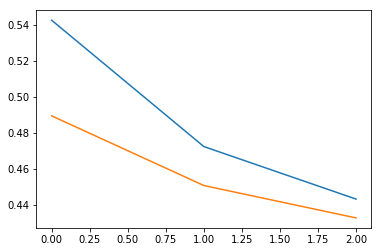

In [49]:
import matplotlib.pyplot as plt
plt.plot(summary_stats.train_loss) # blue
plt.plot(summary_stats.valid_loss) # green
plt.show()

In [50]:
# Find the minimum validation loss during the training
min_loss, idx = min((loss, idx) for (idx, loss) in enumerate(history.history['val_loss']))
print('Minimum loss at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(min_loss))
min_loss = round(min_loss, 4)

Minimum loss at epoch 3 = 0.4328


In [51]:

# Make predictions with the best weights
model.load_weights(save_best_weights,by_name=True)
predictions = model.predict([test_q1, test_q2, test_q1, test_q2], verbose = True)

104289/104289 [==============================] - 61s 584us/step


In [52]:
predictions

array([[ 0.75546575],
       [ 0.01782042],
       [ 0.06185823],
       ..., 
       [ 0.28687394],
       [ 0.00397707],
       [ 0.5350613 ]], dtype=float32)

In [78]:

#Create submission
submission = pd.DataFrame(predictions, columns=['is_duplicate'])
submission.insert(0,'id', test.id)
file_name = 'submission_{}.csv'.format(min_loss)
submission.to_csv(file_name, index=False)

In [83]:
submission['is_duplicate'] = submission['is_duplicate'].map(lambda x: 0 if x < 0.7 else 1)

In [99]:
submission.drop(['id'], axis=1)

,is_duplicate
0,1
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0


In [89]:
y_pred = list(submission['is_duplicate'])

In [90]:
y_pred

[1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [96]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [94]:
accuracy_score(y_true, y_pred)

0.76054042132919097

In [97]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.74      0.95      0.84     66499
    class 1       0.83      0.42      0.56     37790

avg / total       0.78      0.76      0.74    104289



/Users/aashitiwari/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 3
  .format(len(labels), len(target_names))
